<a href="https://colab.research.google.com/github/Agil0509/Deep-Learning/blob/main/LeNet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [64]:
mnist = tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [65]:
X_train.shape

(60000, 28, 28)

In [66]:
y_train.shape

(60000,)

In [67]:
y_train[0]

5

In [68]:
m1,h1,w1 = X_train.shape
X_train = X_train.reshape(m1,h1,w1,1)

m2,h2,w2 = X_test.shape
X_test = X_test.reshape(m2,h2,w2,1)

In [69]:
X_train.shape

(60000, 28, 28, 1)

In [70]:
X_train = X_train/255
X_test = X_test/255

(-0.5, 27.5, 27.5, -0.5)

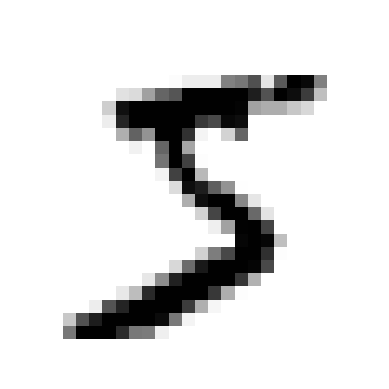

In [71]:
plt.imshow(X_train[0],cmap = 'binary')
plt.axis('off')

#LeNet Architecture

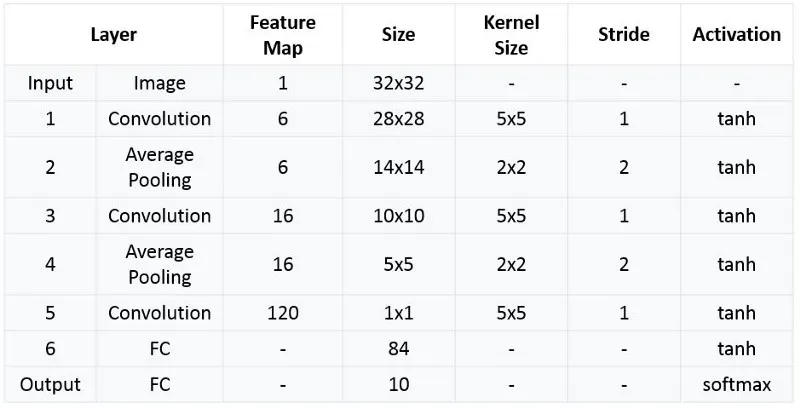

In [72]:
input_shape = (28,28,1)

In [73]:
def LeNet(input_shape):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Conv2D(filters=6,kernel_size = (5,5),strides = (1,1), activation='tanh'))
  model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)))
  model.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (5,5),strides = (1,1), activation='tanh'))
  model.add(tf.keras.layers.AveragePooling2D(pool_size = (2,2), strides=(2,2)))
  # model.add(tf.keras.layers.Conv2D(filters = 120, kernel_size = (1,1),strides = (1,1),activation = 'tanh'))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(units = 84, activation = 'tanh'))
  model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))
  model.compile(
      loss = 'sparse_categorical_crossentropy',
      optimizer = tf.keras.optimizers.SGD(learning_rate=0.001),
      metrics = ['accuracy']
  )
  return model

In [74]:
model = LeNet(input_shape)
epochs = 10
history = model.fit(X_train,y_train, epochs = epochs,
                    validation_data= [X_test,y_test])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.2987 - loss: 2.1757 - val_accuracy: 0.7116 - val_loss: 1.5039
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.7443 - loss: 1.2753 - val_accuracy: 0.8225 - val_loss: 0.7915
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - accuracy: 0.8236 - loss: 0.7518 - val_accuracy: 0.8596 - val_loss: 0.5858
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8519 - loss: 0.5889 - val_accuracy: 0.8765 - val_loss: 0.4948
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8688 - loss: 0.5043 - val_accuracy: 0.8857 - val_loss: 0.4420
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.8785 - loss: 0.4533 - val_accuracy: 0.8927 - val_loss: 0.4059
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8867 - loss: 0.4187 - val_accuracy: 0.8978 - val_loss: 0.3789
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8922 -

In [75]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8933 - loss: 0.3630


[0.32641229033470154, 0.9089999794960022]

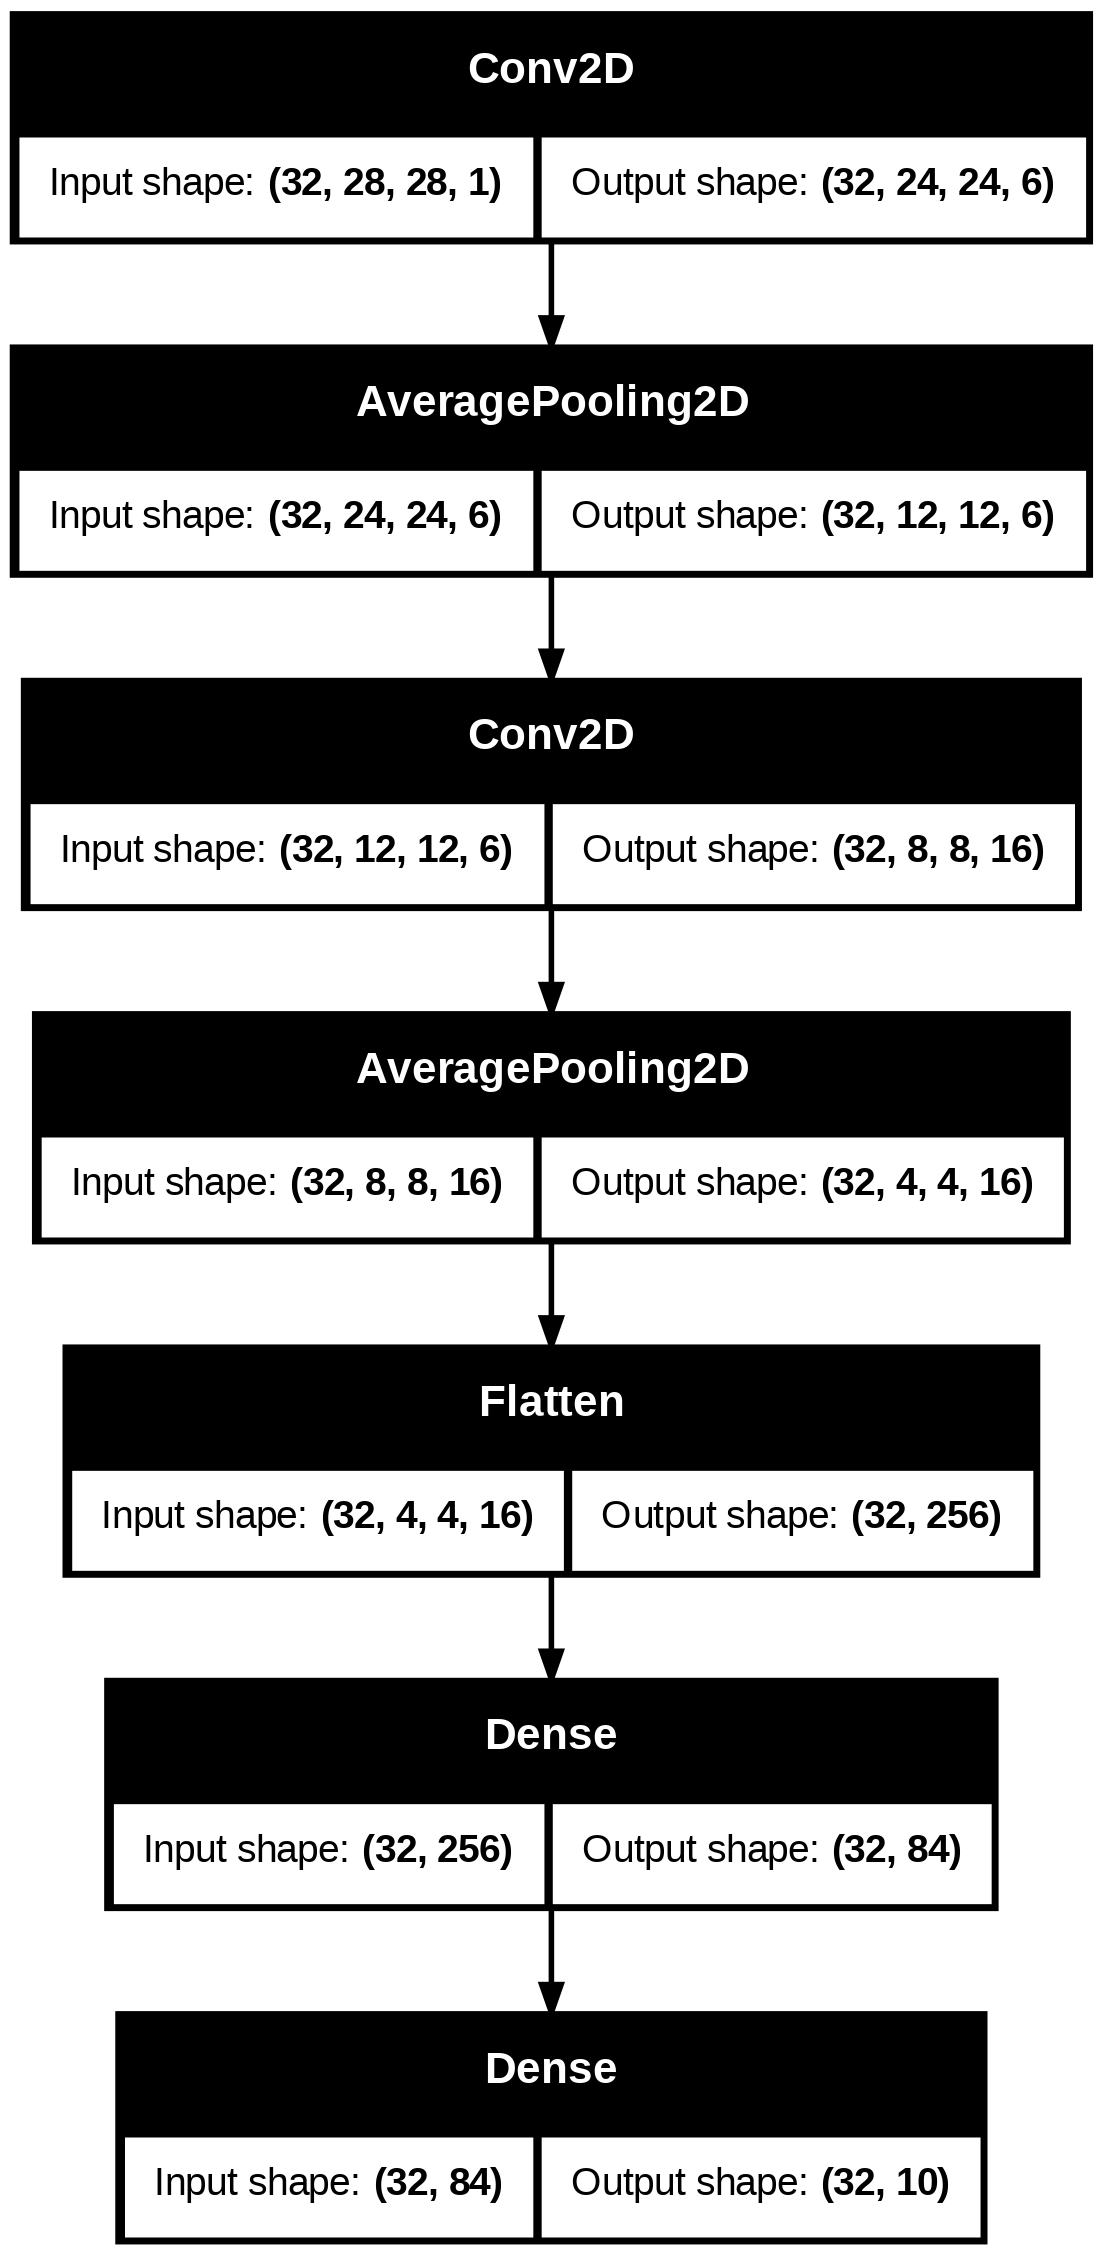

In [77]:
tf.keras.utils.plot_model(model,show_shapes = True)

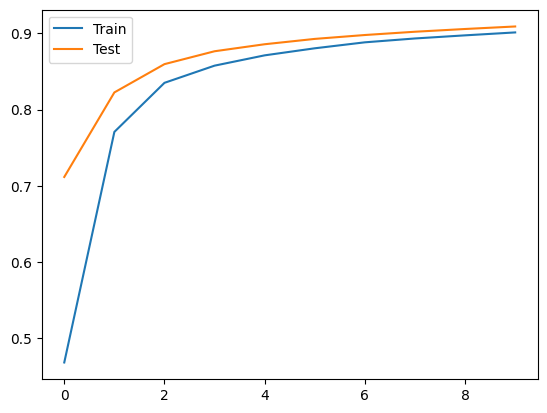

In [78]:
plt.plot(history.history['accuracy'],label = 'Train')
plt.plot(history.history['val_accuracy'],label = 'Test')
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


6

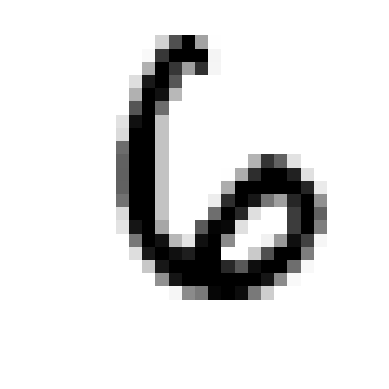

In [79]:
plt.imshow(X_test[88],cmap = 'binary')
plt.axis('off');

pred = model.predict(X_test[88].reshape(1,28,28,1))
np.argmax(pred)